In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data\\train.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_df, test_df = train_test_split(train, train_size=0.7,random_state=0)

In [5]:
train_df.shape, test_df.shape

((29399, 785), (12601, 785))

In [6]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25862,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41632,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29399.000000,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,...,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.0,29399.0,29399.0,29399.0
mean,4.468383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.234464,0.132896,0.060376,0.022314,0.024627,0.004082,0.0,0.0,0.0,0.0
std,2.890090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.719155,4.886360,3.278954,1.930835,2.264368,0.495147,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,252.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
## Check unique label;
set(train['label'])
## we have digit from 0 -9 
## rest 784 column reperesent the image of digit 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

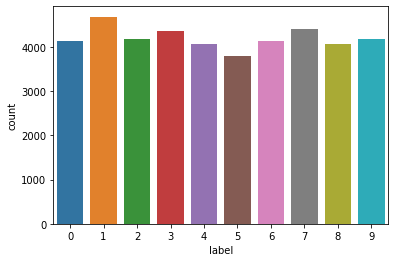

In [7]:
## check the count of each digit 
sns.countplot(train['label'])
plt.show()
## All number have almost same number of data 

In [8]:
## Divide label and image
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label

In [9]:
## Def a function to display image
def display_image(i):
    img=x_train.iloc[i].to_numpy()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(y_label.iloc[i])
    plt.show()


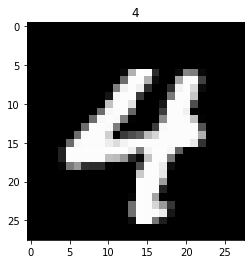

In [10]:
display_image(200) ## look like number is 4


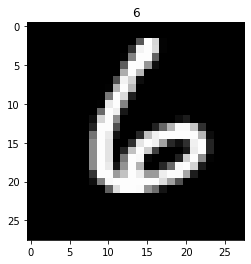

In [11]:
display_image(2000) ## its look like 6

In [12]:
## lets normalized the data, so number will be in range of 0 ,1 
x_train = x_train/255
x_test =  x_test/255 

In [13]:
## lets try pridicting by knn as simple classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [14]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
y_test_predicted = KNN.predict(x_test)

In [16]:
## Lets test the result
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [17]:
## Check acuracy, and confusion matrix
print(accuracy_score(y_test_label,y_test_predicted))
print(confusion_matrix(y_test_label, y_test_predicted))
print(classification_report(y_test_label, y_test_predicted))

0.9665899531783192
[[1232    0    3    0    0    2    5    0    1    0]
 [   0 1418    3    1    1    0    4    1    1    0]
 [  12   12 1227    2    0    0    1   17    3    2]
 [   1    1    8 1252    0   13    2    7    8    6]
 [   1   11    0    0 1184    0    3    0    0   37]
 [   1    0    0   16    1 1080   15    0    1    5]
 [   3    1    0    0    2    3 1234    0    0    0]
 [   1   12    7    0    4    0    0 1297    0   13]
 [   4   16    3   30    6   22    7    2 1101   13]
 [   5    2    3    7   15    3    1   28    0 1155]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1243
           1       0.96      0.99      0.98      1429
           2       0.98      0.96      0.97      1276
           3       0.96      0.96      0.96      1298
           4       0.98      0.96      0.97      1236
           5       0.96      0.97      0.96      1119
           6       0.97      0.99      0.98      1243
           7     

Now we can see KNN give 96% accuracy
we can see precision for 1 and 7 is less and 3 and 5 also, these digit looks similar, may be that is reason of misclassification 

In [18]:
## Now lets try to change the color of image from gray to black and white , to do this , just make 1 where we have pixle value and keep 0 as it its 
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label
x_train[x_train>0]=1
x_test[x_test>0]=1


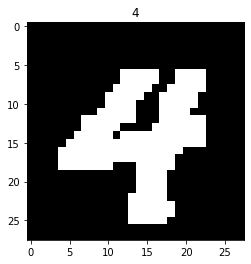

In [19]:
display_image(200)

In [20]:
KNN2 = KNeighborsClassifier(n_neighbors=3)
KNN2.fit(x_train, y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
y2_test_predicted = KNN2.predict(x_test)

In [22]:
## Check acuracy, and confusion matrix
print(accuracy_score(y_test_label,y2_test_predicted))
print(confusion_matrix(y_test_label, y2_test_predicted))
print(classification_report(y_test_label, y2_test_predicted))

0.9616697087532735
[[1229    2    3    1    0    0    6    0    2    0]
 [   0 1417    4    2    1    0    3    0    2    0]
 [  14   10 1226    3    0    1    1   10    9    2]
 [   6    6    6 1227    0   17    2   10   15    9]
 [   1   10    0    0 1164    0    6    1    0   54]
 [   5    3    1   22    3 1047   22    0    7    9]
 [   3    0    0    0    0    3 1236    0    1    0]
 [   2   13    6    1    1    0    0 1282    1   28]
 [  10   24    0   11    6    6    8    3 1124   12]
 [   8    2    1   11   11    3    2   15    0 1166]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1243
           1       0.95      0.99      0.97      1429
           2       0.98      0.96      0.97      1276
           3       0.96      0.95      0.95      1298
           4       0.98      0.94      0.96      1236
           5       0.97      0.94      0.95      1119
           6       0.96      0.99      0.98      1243
           7     

In [24]:
##Lets find the optimal value for k
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label
x_train = x_train/255
x_test =  x_test/255 
len(x_train), len(y_label)


(29399, 29399)

In [26]:
## as GridSearchCV and cross varlidation take more time so let try with less data
x_train_new = x_train.iloc[:5000]
y_label_new = y_label.iloc[:5000]

In [27]:

len(x_train_new), len(y_label_new)

(5000, 5000)

In [28]:
## Now lets work on optimizing the k value of KNN by cross validation and GridSearchCV

knn3 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 15)}

knn3_gscv = GridSearchCV(knn3, param_grid, cv=5)

## Now fit the model
knn3_gscv.fit(x_train_new, y_label_new)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
knn3_gscv.best_params_ 

{'n_neighbors': 3}

We got best n_neighbors as 3 and we used the same 